##### Investigation into the art of model engineering

In [ ]:
import os

# KMeans memory leak errors
N = "12"
os.environ["LOKY_MAX_CPU_COUNT"] = N
os.environ["OMP_NUM_THREADS"] = N
os.environ["MKL_NUM_THREADS"] = N

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df_raw = pd.read_csv("data/loan_default_data.csv")
df_raw.head()

,CreditPolicy,Purpose,IntRate,Installment,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,NotFullyPaid,AnnualInc
0,1,debt_consolidation,0.1189,829.10,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385
1,1,credit_card,0.1071,228.22,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385
4,1,credit_card,0.1426,102.92,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636


### Data Cleaning

In [ ]:
df = pd.get_dummies(df_raw, columns=["Purpose"])
df.head()

,CreditPolicy,IntRate,Installment,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,NotFullyPaid,AnnualInc,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business
0,1,0.1189,829.10,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,False,False,True,False,False,False,False
1,1,0.1071,228.22,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,False,True,False,False,False,False,False
2,1,0.1357,366.86,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,False,False,True,False,False,False,False
3,1,0.1008,162.34,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,False,False,True,False,False,False,False
4,1,0.1426,102.92,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,False,True,False,False,False,False,False


In [ ]:
from sklearn.model_selection import train_test_split

# X = df.drop(columns=['NotFullyPaid'])
# y = df['NotFullyPaid']

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(columns=["NotFullyPaid"]), df.NotFullyPaid, test_size=0.3, random_state=1
)

In [5]:
df_train = X_train.join(y_train)
df_train

,CreditPolicy,IntRate,Installment,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,AnnualInc,Purpose_all_other,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_major_purchase,Purpose_small_business,NotFullyPaid
8673,0,0.1324,60.86,10.85,652,1169.958333,162,54.0,1,0,0,31199.999882,True,False,False,False,False,False,False,0
4496,1,0.1496,110.87,20.43,672,5130.000000,6552,95.4,1,1,0,57500.000185,False,False,True,False,False,False,False,0
7659,1,0.1025,153.83,20.42,712,6990.000000,61140,60.5,0,0,1,79200.000174,False,False,True,False,False,False,False,0
8836,0,0.1336,541.89,16.69,702,4709.958333,19516,68.0,6,0,0,63000.000291,False,False,True,False,False,False,False,1
2198,1,0.0932,51.12,19.21,727,4620.041667,714,10.1,3,0,1,30999.999893,True,False,False,False,False,False,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1,0.1253,133.87,20.91,702,4590.000000,36462,81.0,1,0,0,81995.999625,False,False,True,False,False,False,False,0
7813,0,0.1217,499.45,17.02,712,4320.000000,37570,59.5,5,0,0,83200.000265,False,True,False,False,False,False,False,0
905,1,0.1261,402.08,10.12,672,8864.958333,16083,70.2,0,0,1,50267.999963,False,False,True,False,False,False,False,0
5192,1,0.1565,629.75,9.16,732,4200.000000,13381,49.4,1,0,0,65000.000073,False,False,False,False,False,False,True,0


### EDA

In [6]:
df_train.describe()

,CreditPolicy,IntRate,Installment,Dti,Fico,DaysWithCrLine,RevolBal,RevolUtil,InqLast6mths,Delinq2yrs,PubRec,AnnualInc,NotFullyPaid
count,6704.000000,6704.000000,6704.000000,6704.000000,6704.000000,6704.000000,6.704000e+03,6704.000000,6704.000000,6704.000000,6704.000000,6.704000e+03,6704.000000
mean,0.801014,0.122590,319.644112,12.609300,710.907369,4557.635889,1.694455e+04,46.708816,1.602327,0.159755,0.062351,6.832708e+04,0.157518
std,0.399267,0.027047,206.869072,6.882637,38.010970,2501.947628,3.532676e+04,29.055547,2.184938,0.524771,0.262517,6.229470e+04,0.364316
min,0.000000,0.060000,15.670000,0.000000,612.000000,180.041667,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.896000e+03,0.000000
25%,1.000000,0.103300,164.020000,7.250000,682.000000,2819.958333,3.152250e+03,22.600000,0.000000,0.000000,0.000000,3.840000e+04,0.000000
50%,1.000000,0.122100,268.530000,12.600000,707.000000,4110.041667,8.546500e+03,46.100000,1.000000,0.000000,0.000000,5.518800e+04,0.000000
75%,1.000000,0.141100,434.867500,17.940000,737.000000,5730.041667,1.808175e+04,70.700000,2.000000,0.000000,0.000000,8.000000e+04,0.000000
max,1.000000,0.216400,922.420000,29.950000,827.000000,17616.000000,1.207359e+06,119.000000,33.000000,11.000000,4.000000,2.039784e+06,1.000000


In [7]:
df_train['NotFullyPaid'].mean()

np.float64(0.1575178997613365)

In [ ]:
purpose_cols = [
    "Purpose_all_other",
    "Purpose_credit_card",
    "Purpose_debt_consolidation",
    "Purpose_educational",
    "Purpose_home_improvement",
    "Purpose_major_purchase",
    "Purpose_small_business",
]

# What purpose defaults the most
for col in purpose_cols:
    avg_default = df_train[df_train[col] == 1]["NotFullyPaid"].mean()
    print(f"Average default for {col}: {avg_default}")

Average default for Purpose_all_other: 0.16227801592161667
Average default for Purpose_credit_card: 0.11704545454545455
Average default for Purpose_debt_consolidation: 0.1455535390199637
Average default for Purpose_educational: 0.20948616600790515
Average default for Purpose_home_improvement: 0.17391304347826086
Average default for Purpose_major_purchase: 0.1266233766233766
Average default for Purpose_small_business: 0.271689497716895


### Tracking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


# Returns model dict
def make_models():
    return {
        "LR_L2": LogisticRegression(random_state=0, solver="liblinear", max_iter=200),
        "LR_L1": LogisticRegression(
            random_state=0,
            penalty="l1",
            solver="liblinear",
            class_weight="balanced",
            max_iter=500,
        ),
        "CART": DecisionTreeClassifier(random_state=0, class_weight="balanced"),
        "RF": RandomForestClassifier(random_state=0, class_weight="balanced"),
    }

In [ ]:
# Initialize a tuple of names for each model
model_names = (
    "LR_L2",  # Logistic regression with L2 regularizer
    "LR_L1",  # Logistic regression with L1 regularizer
    "CART",  # CART tree classifier
    "RF",  # Random forest classifier
)

engineering_techniques = (
    "Baseline",  # Set of baseline models
    "Scaling",  # Set of models trained with scaled data
    "Feature Engineering",  # Set of models trained with engineered features
    "Feature_Selection",  # Set of models trained with "selected" features
    "Grid Search",  # Set of models trained via grid search
    "Stacking",  # Set of stacked model
    "Bagging",  # A bagged model
)

# Initialize multi indices of the all_models data frame
df_indices = pd.MultiIndex.from_product(
    [model_names, engineering_techniques], names=("model names", "technique")
)

# Initialize the all_models data frame
all_models = pd.DataFrame(
    index=df_indices, columns=["Precision", "Recall", "Score", "Model"]
)

all_models[["Precision", "Recall", "Score"]] = all_models[
    ["Precision", "Recall", "Score"]
].astype(float)

all_models

Precision  Recall  Score Model
model names technique                                          
LR_L2       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
LR_L1       Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
CART        Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN
RF          Baseline                   NaN     NaN    NaN   NaN
            Scaling                    NaN     NaN    NaN   NaN
            Feature Engineering        NaN     NaN    NaN   NaN
            Feature_Selection          NaN     NaN    NaN   NaN
            Grid Search                NaN     NaN    NaN   NaN
            Stacking                   NaN     NaN    NaN   NaN
            Bagging                    NaN     NaN    NaN   NaN

In [ ]:
from sklearn.metrics import precision_score, recall_score


def fit_and_score_model(
    all_models, stage_name, X_train, X_out_of_sample, y_train, y_out_of_sample
):

    # Make a dictionary of models
    models_dict = make_models()

    # Loop through each model in model_dict
    for model_name in models_dict:
        model = models_dict[model_name]

        model.fit(X_train, y_train)
        y_preds = model.predict(X_out_of_sample)

        model_precision = precision_score(y_out_of_sample, y_preds)
        model_recall = recall_score(y_out_of_sample, y_preds)
        model_score = 0.5 * (model_precision + model_recall)

        print(
            f"{model_name} achieved a precision of {model_precision:.3f} and recall of {model_recall:.3f}"
        )

        all_models.loc[model_name, stage_name] = np.array(
            (model_precision, model_recall, model_score, model), dtype="object"
        )

    return all_models


all_models = fit_and_score_model(
    all_models, "Baseline", X_train, X_test, y_train, y_test
)

all_models.loc[:, "Baseline", :].head()

/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


LR_L2 achieved a precision of 0.000 and recall of 0.000
LR_L1 achieved a precision of 0.257 and recall of 0.579
CART achieved a precision of 0.185 and recall of 0.191
RF achieved a precision of 0.500 and recall of 0.006


,Precision,Recall,Score,Model
model names,,,,
LR_L2,0.000000,0.000000,0.000000,"LogisticRegression(max_iter=200, random_state=..."
LR_L1,0.256506,0.578616,0.417561,"LogisticRegression(class_weight='balanced', ma..."
CART,0.185336,0.190776,0.188056,DecisionTreeClassifier(class_weight='balanced'...
RF,0.500000,0.006289,0.253145,"(DecisionTreeClassifier(max_features='sqrt', r..."


In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix

y_test_predictions = all_models.Model.loc["LR_L2", "Baseline"].predict(X_test)

precision = precision_score(y_test, y_test_predictions, zero_division=0)
recall = recall_score(y_test, y_test_predictions, zero_division=0)
cm = confusion_matrix(y_test, y_test_predictions)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print("Confusion Matrix:\n", cm)

Precision: 0.000
Recall: 0.000
Confusion Matrix:
 [[2397    0]
 [ 477    0]]


## Model Engineering

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

technique_name = "Scaling"


def standardize_data(X_train, X_out_of_sample):

    # Define scaling function
    scaler = StandardScaler()

    X_train_scaled_arr = scaler.fit_transform(X_train)
    X_out_of_sample_scaled_arr = scaler.transform(X_out_of_sample)

    X_train_standardized = pd.DataFrame(
        X_train_scaled_arr, columns=X_train.columns, index=X_train.index
    )

    X_out_of_sample_standardized = pd.DataFrame(
        X_out_of_sample_scaled_arr,
        columns=X_out_of_sample.columns,
        index=X_out_of_sample.index,
    )

    return X_train_standardized, X_out_of_sample_standardized, scaler


# Make new data that is scaled"
X_train_scaled, X_test_scaled, scaler = standardize_data(X_train, X_test)

# Fit and score a model trained with scaled data
all_models = fit_and_score_model(
    all_models, technique_name, X_train_scaled, X_test_scaled, y_train, y_test
)
all_models.loc[:, technique_name, :].head()

LR_L2 achieved a precision of 0.471 and recall of 0.017
LR_L1 achieved a precision of 0.257 and recall of 0.587
CART achieved a precision of 0.186 and recall of 0.191
RF achieved a precision of 0.500 and recall of 0.006


,Precision,Recall,Score,Model
model names,,,,
LR_L2,0.470588,0.016771,0.243680,"LogisticRegression(max_iter=200, random_state=..."
LR_L1,0.257353,0.587002,0.422178,"LogisticRegression(class_weight='balanced', ma..."
CART,0.186094,0.190776,0.188435,DecisionTreeClassifier(class_weight='balanced'...
RF,0.500000,0.006289,0.253145,"(DecisionTreeClassifier(max_features='sqrt', r..."


In [ ]:
def compare_models(technique_name):

    # Evaluate score differences
    score_differences = (
        all_models.loc[:, technique_name, :].Score.values
        - all_models.loc[:, "Baseline", :].Score.values
    )

    # Get the average and biggest score improvement
    mean_score_difference = score_differences.mean()
    most_score_improvement = score_differences.max()

    print(
        f"On average, scores improved by {mean_score_difference:.3f}, and the most improvement was {most_score_improvement:.3f}"
    )

technique_name = "Scaling"
compare_models(technique_name)

On average, scores improved by 0.062, and the most improvement was 0.244


In [ ]:
# Transform the data back to original units
transformed_X_train = scaler.inverse_transform(X_train_scaled)
transformed_X_test = scaler.inverse_transform(X_test_scaled)

# Evaluate the average of each data set
print(
    f"The mean of the scaled feature in column 0 is {X_train_scaled.iloc[:, 0].mean():.3f} and {X_test_scaled.iloc[:, 0].mean():.3f} for training and testing, respectively."
)
print(
    f"The mean of the un-scaled feature in column 0 is {transformed_X_train[:, 0].mean():.3f} and {transformed_X_test[:,0].mean():.3f} for training and testing, respectively."
)

The mean of the scaled feature in column 0 is -0.000 and 0.033 for training and testing, respectively.
The mean of the un-scaled feature in column 0 is 0.801 and 0.814 for training and testing, respectively.


### Feature Engineering

#### Interaction Effects

In [ ]:
from sklearn.feature_selection import f_classif

# Create a list of F-values for the existing features
feature_F_scores, _ = f_classif(X_train, y_train)

# Iterate through each combination of features
for f1_index, f1 in enumerate(X_train.columns):
    for f2_index, f2 in enumerate(X_train.columns[f1_index + 1 :]):

        # Multiply the two features to create a new feature
        new_feature = X_train[[f1]].multiply(X_train[f2], axis=0)

        # Evaluate F-value of new feature
        F_Score_new, p_value_new = f_classif(new_feature, y_train)

        # Evaluate the relative improvement of the new feature
        F_score_improvement = F_Score_new[0] / max(feature_F_scores[[f1_index, f2_index]])

        # Print out features that is sufficiently improved
        if F_score_improvement >= 1.5 and F_Score_new[0] >= 75 and p_value_new < 0.05:
            print(f"{f1} + {f2} has an F-score of {F_Score_new[0]:.2f}")
            print(f"\tBetter by a factor of {F_score_improvement:.2f} over features in isolation")
            print(f"\tThe result is significant (p = {p_value_new})")

Installment + InqLast6mths has an F-score of 134.11
	Better by a factor of 8.57 over features in isolation
	The result is significant (p = [1.01107633e-30])
DaysWithCrLine + InqLast6mths has an F-score of 96.81
	Better by a factor of 6.18 over features in isolation
	The result is significant (p = [1.08827276e-22])


/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:110: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/feature_selection/_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/Users/zaherarman/Docume

In [ ]:
technique_name = "Feature Engineering"


def new_feature_combos(X):

    # First, we make a copy of the original X features
    X_new = X.copy()

    # Write your code here
    X_new["Installment * InqLast6mths"] = X_new["Installment"] * X_new["InqLast6mths"]
    X_new["DaysWithCrLine * InqLast6mths"] = (
        X_new["DaysWithCrLine"] * X_new["InqLast6mths"]
    )

    return X_new


# Make new X features with interactions
X_train_interactions = new_feature_combos(X_train)
X_test_interactions = new_feature_combos(X_test)

# Fit and score the model, save it to the all models dictionary
all_models = fit_and_score_model(
    all_models,
    technique_name,
    X_train_interactions,
    X_test_interactions,
    y_train,
    y_test,
)
compare_models(technique_name)

LR_L2 achieved a precision of 0.643 and recall of 0.019
LR_L1 achieved a precision of 0.259 and recall of 0.591
CART achieved a precision of 0.192 and recall of 0.176
RF achieved a precision of 0.429 and recall of 0.006
On average, scores improved by 0.075, and the most improvement was 0.331


### Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

# Initialize feature selector: choose top 10 features with highest ANOVA F-scores
selector = SelectKBest(score_func=f_classif, k=10)

# Fit selector on training data to compute scores for each feature
selector.fit(X_train, y_train)

# Boolean mask: True = selected, False = not selected
mask = selector.get_support()

# Use mask to extract column names of selected features
selected_features = X_train.columns[mask]

# Display the top 10 features
print("Top 10 Selected Features:")
for feature in selected_features:
    print(feature)

Top 10 Selected Features:
CreditPolicy
IntRate
Installment
Fico
RevolBal
RevolUtil
InqLast6mths
PubRec
Purpose_credit_card
Purpose_small_business


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

technique_name = "Feature_Selection"

all_models = fit_and_score_model(
    all_models, technique_name, X_train_selected, X_test_selected, y_train, y_test
)
compare_models(technique_name)

LR_L2 achieved a precision of 0.733 and recall of 0.023
LR_L1 achieved a precision of 0.259 and recall of 0.572
CART achieved a precision of 0.228 and recall of 0.218
RF achieved a precision of 0.429 and recall of 0.019
On average, scores improved by 0.095, and the most improvement was 0.378


### Grid Search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Dictionary of parameters to search
params_to_search = {
    "criterion": ["gini", "entropy"],
    "min_samples_leaf": [1, 2, 5, 10, 20],
    "max_features": ["sqrt", "log2", None],
    "class_weight": ["balanced", None],
}

# Initialize a model
mdl = DecisionTreeClassifier(random_state=0)

# Initialize the grid search
optimized_dt = GridSearchCV(
    mdl, params_to_search, scoring=["recall", "precision"], refit=False, cv=5
)

# Run the grid search
optimized_dt.fit(X_train, y_train)

,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'class_weight': ['balanced', None], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...]}"
,scoring,"['recall', 'precision']"
,n_jobs,None
,refit,False
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [ ]:
precision = optimized_dt.cv_results_["mean_test_precision"]
recall = optimized_dt.cv_results_["mean_test_recall"]

print(precision)
print("\n")
print(recall)

[0.19831534 0.17617518 0.19578053 0.19753741 0.19577845 0.19831534
 0.17617518 0.19578053 0.19753741 0.19577845 0.21426515 0.204767
 0.1965358  0.19494674 0.19864402 0.21140401 0.19760242 0.20753138
 0.19442161 0.19972493 0.21140401 0.19760242 0.20753138 0.19442161
 0.19972493 0.22841615 0.21850826 0.20618066 0.19604178 0.1924901
 0.19745417 0.22562397 0.21885559 0.28026434 0.32437161 0.19745417
 0.22562397 0.21885559 0.28026434 0.32437161 0.20959447 0.22459397
 0.22504352 0.24026574 0.25126194 0.19133838 0.20265041 0.21749228
 0.2316127  0.26457105 0.19133838 0.20265041 0.21749228 0.2316127
 0.26457105 0.18065741 0.19050443 0.20724393 0.22888397 0.27775271]


[0.18749888 0.25474381 0.42237325 0.50099258 0.50945632 0.18749888
 0.25474381 0.42237325 0.50099258 0.50945632 0.20264687 0.2386703
 0.36554592 0.43653313 0.4943128  0.2083609  0.26795583 0.44792542
 0.48761513 0.52840472 0.2083609  0.26795583 0.44792542 0.48761513
 0.52840472 0.22538228 0.2509434  0.36267102 0.42517214 0.473446

In [22]:
import seaborn as sns

cv = pd.DataFrame(optimized_dt.cv_results_)
cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,param_min_samples_leaf,params,split0_test_recall,...,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,split4_test_precision,mean_test_precision,std_test_precision,rank_test_precision
0,0.010851,0.001753,0.002264,0.000114,balanced,gini,sqrt,1,"{'class_weight': 'balanced', 'criterion': 'gin...",0.180095,...,0.024080,36,0.175115,0.237113,0.213930,0.185185,0.180233,0.198315,0.023608,37
1,0.009574,0.000875,0.002069,0.000038,balanced,gini,sqrt,2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.279621,...,0.023192,21,0.184953,0.175074,0.180887,0.175676,0.164286,0.176175,0.006958,59
2,0.008993,0.000350,0.002074,0.000036,balanced,gini,sqrt,5,"{'class_weight': 'balanced', 'criterion': 'gin...",0.426540,...,0.026730,15,0.191083,0.206208,0.188506,0.185841,0.207265,0.195781,0.009104,47
3,0.007930,0.000416,0.002151,0.000087,balanced,gini,sqrt,10,"{'class_weight': 'balanced', 'criterion': 'gin...",0.540284,...,0.031710,5,0.208029,0.196113,0.203219,0.178439,0.201887,0.197537,0.010277,41
4,0.006976,0.000400,0.002024,0.000023,balanced,gini,sqrt,20,"{'class_weight': 'balanced', 'criterion': 'gin...",0.473934,...,0.026630,3,0.186916,0.197615,0.199262,0.199282,0.195817,0.195778,0.004611,49


<Axes: xlabel='mean_test_precision', ylabel='mean_test_recall'>

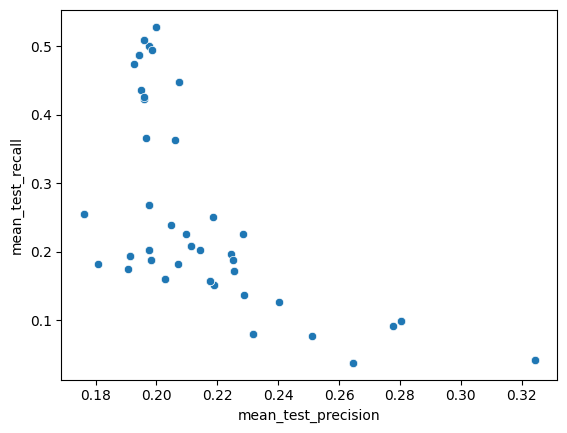

In [23]:
sns.scatterplot(
    data=cv,
    x="mean_test_precision",
    y="mean_test_recall",
)

In [ ]:
cv["sum"] = cv["mean_test_precision"] + cv["mean_test_recall"]
highest_idx = cv["sum"].idxmax()

best_params = cv.loc[highest_idx, "params"]
best_precision = cv.loc[highest_idx, "mean_test_precision"]
best_recall = cv.loc[highest_idx, "mean_test_recall"]
best_sum = cv.loc[highest_idx, "sum"]

print("Best parameters:", best_params)
print(f"Precision: {best_precision:.3f}, Recall: {best_recall:.3f}, Sum: {best_sum:.3f}")

Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 20}
Precision: 0.200, Recall: 0.528, Sum: 0.728


In [ ]:
p_max = cv["mean_test_precision"].max()
best_p = cv.loc[
    cv["mean_test_precision"] == p_max,
    ["params", "mean_test_precision", "mean_test_recall"],
]

r_max = cv["mean_test_recall"].max()
best_r = cv.loc[
    cv["mean_test_recall"] == r_max,
    ["params", "mean_test_precision", "mean_test_recall"],
]

print("Highest Precision:")
for _, row in best_p.iterrows():
    print(row["params"])
    print(f"precision={row['mean_test_precision']:.3f}, recall={row['mean_test_recall']:.3f}\n")

print("Highest Recall")
for _, row in best_r.iterrows():
    print(row["params"])
    print(f"precision={row['mean_test_precision']:.3f}, recall={row['mean_test_recall']:.3f}\n")

Highest Precision:
{'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_leaf': 20}
precision=0.324, recall=0.043

{'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 20}
precision=0.324, recall=0.043

Highest Recall
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_leaf': 20}
precision=0.200, recall=0.528

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'log2', 'min_samples_leaf': 20}
precision=0.200, recall=0.528



In [ ]:
technique_name = 'Grid Search'

# Find the model with the highest sum of precision and recall
params = optimized_dt.cv_results_['params']
mean_test_precision = optimized_dt.cv_results_["mean_test_precision"] 
mean_test_recall = optimized_dt.cv_results_["mean_test_recall"]    

best_model_params_index = (mean_test_precision + mean_test_recall).argmax()
best_model_params = params[best_model_params_index]

# Initialize the model
best_model = DecisionTreeClassifier(random_state=0, **best_model_params)
'''Note, the ** from above allows us to use a dictionary to set
the parameters of a function'''

# Fit the model on the ENTIRE training set
best_model.fit(X_train, y_train)

# Evaluate model precision, recall, and score
model_precision = precision_score(y_test, best_model.predict(X_test))  # evaluate precision on test set
model_recall = recall_score(y_test, best_model.predict(X_test))  # evaluate recall on test set
model_score = (model_precision + model_recall) / 2

# Add model scores to all_models data frame
all_models.loc['CART', 'Grid Search'] = (model_precision, model_recall, model_score, best_model)
all_models['Score'].loc['CART', ['Baseline', 'Grid Search']]


,Precision,Recall,Score,Model
technique,,,,
Baseline,0.185336,0.190776,0.188056,DecisionTreeClassifier(class_weight='balanced'...
Grid Search,0.196286,0.465409,0.330848,DecisionTreeClassifier(class_weight='balanced'...


### Clustering

In [27]:
from sklearn.cluster import KMeans

# Define clustering model
mdk_k_means = KMeans(n_init=1, n_clusters=10, random_state=1)

# Fit the model to the training set
mdk_k_means.fit(X_train)

# Get cluster assignments for each data point
clK = mdk_k_means.predict(X_train)

# Get the centroid of each cluster
Centroids = mdk_k_means.cluster_centers_

In [ ]:
# Convert cluster labels into a DataFrame so we can analyze
cluster_df = pd.DataFrame(
    {"cluster": clK, "educational": X_train["Purpose_educational"].values}
)

educational_counts = cluster_df.groupby("cluster")["educational"].sum()

educational_counts

cluster
0     53
1      1
2      0
3      7
4     22
5      0
6      0
7    159
8      0
9     11
Name: educational, dtype: int64

In [ ]:
from sklearn.cluster import KMeans

# Define clustering model
mdk2_k_means = KMeans(n_init=1, n_clusters=10, random_state=0)

# Fit the model to the training set
mdk2_k_means.fit(X_train)

# Get cluster assignments for each data point
clK2 = mdk2_k_means.predict(X_train)

# Get the centroid of each cluster
Centroids2 = mdk2_k_means.cluster_centers_

# Convert cluster labels into a DataFrame so we can analyze
cluster2_df = pd.DataFrame(
    {"cluster": clK2, "educational": X_train["Purpose_educational"].values}
)

# Count educational loans in each cluster
educational_counts2 = cluster2_df.groupby("cluster")["educational"].sum()

educational_counts2

cluster
0     53
1      1
2      0
3     15
4      0
5      0
6      1
7    156
8      0
9     27
Name: educational, dtype: int64

In [ ]:
mdk3_k_means = KMeans(n_init=100, n_clusters=10, random_state=0)

# Fit the model to the training set
mdk3_k_means.fit(X_train)

# Get cluster assignments for each data point
clK3 = mdk3_k_means.predict(X_train)

# Get the centroid of each cluster
Centroids3 = mdk3_k_means.cluster_centers_

# Convert cluster labels into a DataFrame so we can analyze
cluster3_df = pd.DataFrame(
    {"cluster": clK3, "educational": X_train["Purpose_educational"].values}
)

# Count educational loans in each cluster
educational_counts3 = cluster3_df.groupby("cluster")["educational"].sum()

educational_counts3

cluster
0    170
1     11
2      0
3      0
4     47
5      0
6      0
7     21
8      2
9      2
Name: educational, dtype: int64

### Ensemble

In [ ]:
technique_name = "Stacking"

# Initialize the clustering model
model = KMeans(n_init=10, n_clusters=6, random_state=0)
model.fit(X_train)

# Stack training data
X_train_prediction = pd.Series(
    model.predict(X_train), name="cluster", index=X_train.index
)

# One-hot-encode cluster numbers
X_train_prediction = pd.get_dummies(X_train_prediction)

# Stack testing data
X_test_prediction = pd.Series(model.predict(X_test), name="cluster", index=X_test.index)

# One-hot-encode cluster numbers
X_test_prediction = pd.get_dummies(X_test_prediction)

# Get cluster numbers that weren't predicted in the testing set
missing_cluster_columns = X_train_prediction.columns.difference(
    X_test_prediction.columns
)

# Add missing cluster dummy variables
X_test_prediction[missing_cluster_columns] = 0

# Cnvert column names from int to str
X_train_prediction.columns = [str(c) for c in X_train_prediction.columns]
X_test_prediction.columns = [str(c) for c in X_test_prediction.columns]
X_test_prediction = X_test_prediction[[c for c in X_train_prediction.columns]]

# Add cluster numbers to features: training
X_train_stacked = X_train.join(X_train_prediction)

# Add cluster numbers to features: test
X_test_stacked = X_test.join(X_test_prediction)

all_models = fit_and_score_model(
    all_models, technique_name, X_train_stacked, X_test_stacked, y_train, y_test
)
compare_models(technique_name)

/Users/zaherarman/Documents/Work/Studies/machine-learning/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


LR_L2 achieved a precision of 0.000 and recall of 0.000
LR_L1 achieved a precision of 0.259 and recall of 0.585
CART achieved a precision of 0.182 and recall of 0.184
RF achieved a precision of 0.400 and recall of 0.004
On average, scores improved by -0.013, and the most improvement was 0.004


### Bagging Models

In [ ]:
from sklearn.ensemble import VotingClassifier

# from sklearn.ensemble import VotingClassifier
technique_name = 'Bagging'

# Get a list of initialized models for bagging
models_dict = make_models()

# Convert models to list of tuples (required by documentation)
model_list = list(models_dict.items())

# Set the weights for each model as their relative performance
bagging_weights = all_models.Score[:,'Baseline'].values

# Initialize bagging model
bagging_model = VotingClassifier(model_list, weights=bagging_weights)

# Fit the bagging model (i.e., each of the four models that are bagged)
bagging_model.fit(X_train, y_train)

# Predict the target using the bagged model
bagging_prediction = bagging_model.predict(X_test)

# Evaluate ensemble model
model_precision = precision_score(y_test,  bagging_prediction)  # evaluate precision on testing set
model_recall = recall_score(y_test,  bagging_prediction)  # evaluate recall on testing set
model_score = (model_precision + model_recall) / 2

# Add ensemble model to all_models dataframe
all_models.loc[:, technique_name, :] = (model_precision, model_recall, model_score, None)
compare_models(technique_name)

On average, scores improved by -0.016, and the most improvement was 0.199


In [35]:
all_models

Precision    Recall     Score  \
model names technique                                            
LR_L2       Baseline              0.000000  0.000000  0.000000   
            Scaling               0.470588  0.016771  0.243680   
            Feature Engineering   0.642857  0.018868  0.330863   
            Feature_Selection     0.733333  0.023061  0.378197   
            Grid Search                NaN       NaN       NaN   
            Stacking              0.000000  0.000000  0.000000   
            Bagging               0.255639  0.142558  0.199098   
LR_L1       Baseline              0.256506  0.578616  0.417561   
            Scaling               0.257353  0.587002  0.422178   
            Feature Engineering   0.259191  0.591195  0.425193   
            Feature_Selection     0.258768  0.572327  0.415547   
            Grid Search                NaN       NaN       NaN   
            Stacking              0.259053  0.584906  0.421979   
            Bagging               0.255639  0.142558  0.199098   
CART        Baseline              0.185336  0.190776  0.188056   
            Scaling               0.186094  0.190776  0.188435   
            Feature Engineering   0.191781  0.176101  0.183941   
            Feature_Selection     0.227571  0.218029  0.222800   
            Grid Search           0.255639  0.142558  0.199098   
            Stacking              0.181818  0.184486  0.183152   
            Bagging               0.255639  0.142558  0.199098   
RF          Baseline              0.500000  0.006289  0.253145   
            Scaling               0.500000  0.006289  0.253145   
            Feature Engineering   0.428571  0.006289  0.217430   
            Feature_Selection     0.428571  0.018868  0.223720   
            Grid Search                NaN       NaN       NaN   
            Stacking              0.400000  0.004193  0.202096   
            Bagging               0.255639  0.142558  0.199098   

                                                                             Model  
model names technique                                                               
LR_L2       Baseline             LogisticRegression(max_iter=200, random_state=...  
            Scaling              LogisticRegression(max_iter=200, random_state=...  
            Feature Engineering  LogisticRegression(max_iter=200, random_state=...  
            Feature_Selection    LogisticRegression(max_iter=200, random_state=...  
            Grid Search                                                        NaN  
            Stacking             LogisticRegression(max_iter=200, random_state=...  
            Bagging                                                           None  
LR_L1       Baseline             LogisticRegression(class_weight='balanced', ma...  
            Scaling              LogisticRegression(class_weight='balanced', ma...  
            Feature Engineering  LogisticRegression(class_weight='balanced', ma...  
            Feature_Selection    LogisticRegression(class_weight='balanced', ma...  
            Grid Search                                                        NaN  
            Stacking             LogisticRegression(class_weight='balanced', ma...  
            Bagging                                                           None  
CART        Baseline             DecisionTreeClassifier(class_weight='balanced'...  
            Scaling              DecisionTreeClassifier(class_weight='balanced'...  
            Feature Engineering  DecisionTreeClassifier(class_weight='balanced'...  
            Feature_Selection    DecisionTreeClassifier(class_weight='balanced'...  
            Grid Search          DecisionTreeClassifier(class_weight='balanced'...  
            Stacking             DecisionTreeClassifier(class_weight='balanced'...  
            Bagging                                                           None  
RF          Baseline             (DecisionTreeClassifier(max_features='sqrt', r...  
            